# **CASE: SATISFAÇÃO EM RESTAURANTE**

---

### Instalação de bibliotecas

In [1]:
# # Para geração de correlograma
# install.packages("GGally")
# # Para cálculo do VIF
# install.packages("car")

### Carregamento de bibliotecas

In [1]:
library(GGally)
library(car)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: carData



### Leitura da base de dados

In [2]:
dados_escolas <- read.table(file   = "../Dados/Performance_Escolas.txt",
                                sep    = "\t",
                                dec    = ",",
                                header = TRUE)

### Visualização da base de dados

In [29]:
View(dados_escolas)

COD_ESCOLA,TEMPO_MEDIO_EDUC_PAIS,PERC_ALUNOS_BOLSA_FAM,PERC_ALUNOS_DEFICIT_APREND,ESCOLA_TEMPO_INTEG,PERC_PROF_POS_GRAD,PERC_PROF_TEMP,IDEB
<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>
100488,6.2,24,8,0,70,2,6.3
100512,3.8,65,24,0,50,22,4.7
101897,6.0,55,34,0,50,19,6.1
101927,5.7,33,25,0,62,8,6.2
104769,6.5,0,0,0,65,5,7.5
104978,6.6,6,3,0,70,2,7.6
109330,6.1,26,9,0,55,25,6.3
109361,4.5,52,28,0,51,21,4.7
111465,5.2,0,21,0,64,6,6.2


### Análise exploratória breve

In [31]:
# Medidas resumo
summary(dados_escolas)

   COD_ESCOLA     TEMPO_MEDIO_EDUC_PAIS PERC_ALUNOS_BOLSA_FAM PERC_ALUNOS_DEFICIT_APREND ESCOLA_TEMPO_INTEG PERC_PROF_POS_GRAD PERC_PROF_TEMP       IDEB      
 Min.   :100488   Min.   :2.600         Min.   : 0.00         Min.   : 0.00              Min.   :0.00000    Min.   :18.00      Min.   : 0.00   Min.   :3.600  
 1st Qu.:289319   1st Qu.:5.000         1st Qu.: 0.00         1st Qu.: 4.00              1st Qu.:0.00000    1st Qu.:55.00      1st Qu.: 4.00   1st Qu.:5.400  
 Median :467034   Median :5.900         Median :14.00         Median :10.00              Median :0.00000    Median :62.00      Median : 9.00   Median :6.200  
 Mean   :457282   Mean   :5.841         Mean   :21.90         Mean   :14.01              Mean   :0.02375    Mean   :59.85      Mean   :10.48   Mean   :6.212  
 3rd Qu.:612179   3rd Qu.:6.700         3rd Qu.:36.25         3rd Qu.:21.00              3rd Qu.:0.00000    3rd Qu.:66.00      3rd Qu.:15.00   3rd Qu.:7.000  
 Max.   :798200   Max.   :9.000         Max.  

In [32]:
# Tabela de frequências
table(dados_escolas$ESCOLA_TEMPO_INTEG)
prop.table(table(dados_escolas$ESCOLA_TEMPO_INTEG))


  0   1 
781  19 


      0       1 
0.97625 0.02375 

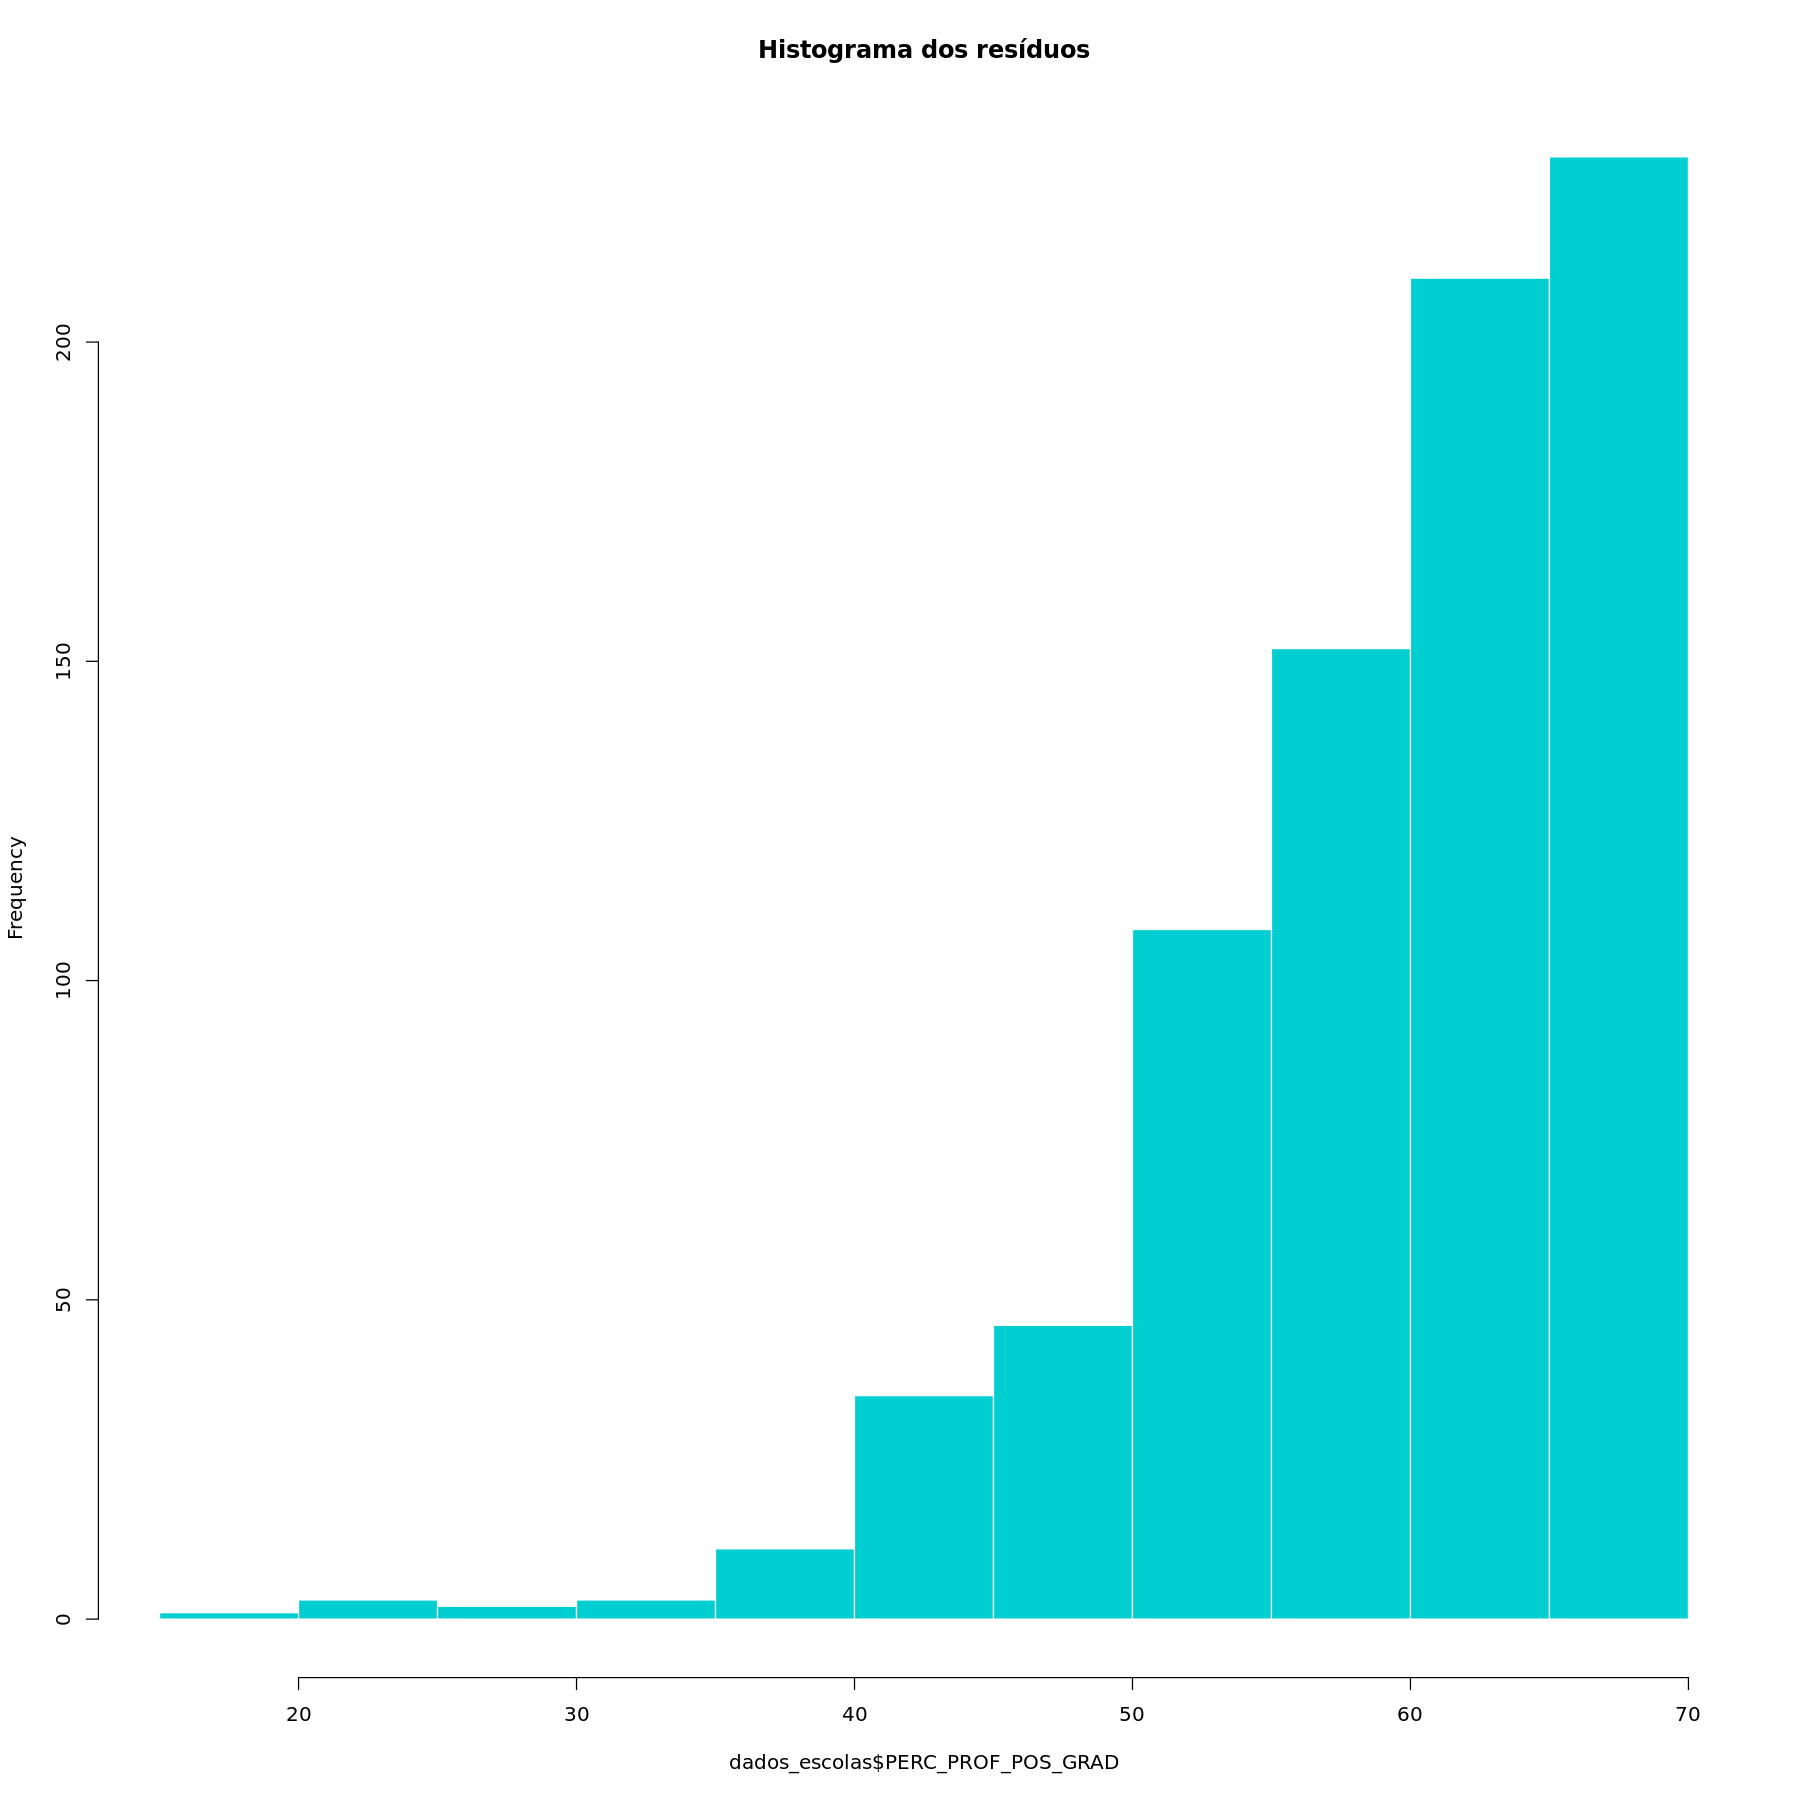

In [110]:
# Histograma dos resíduos
hist(x      = dados_escolas$PERC_PROF_POS_GRAD  ,
     main   = "Histograma dos resíduos",
     col    = "darkturquoise",
     border = "white")

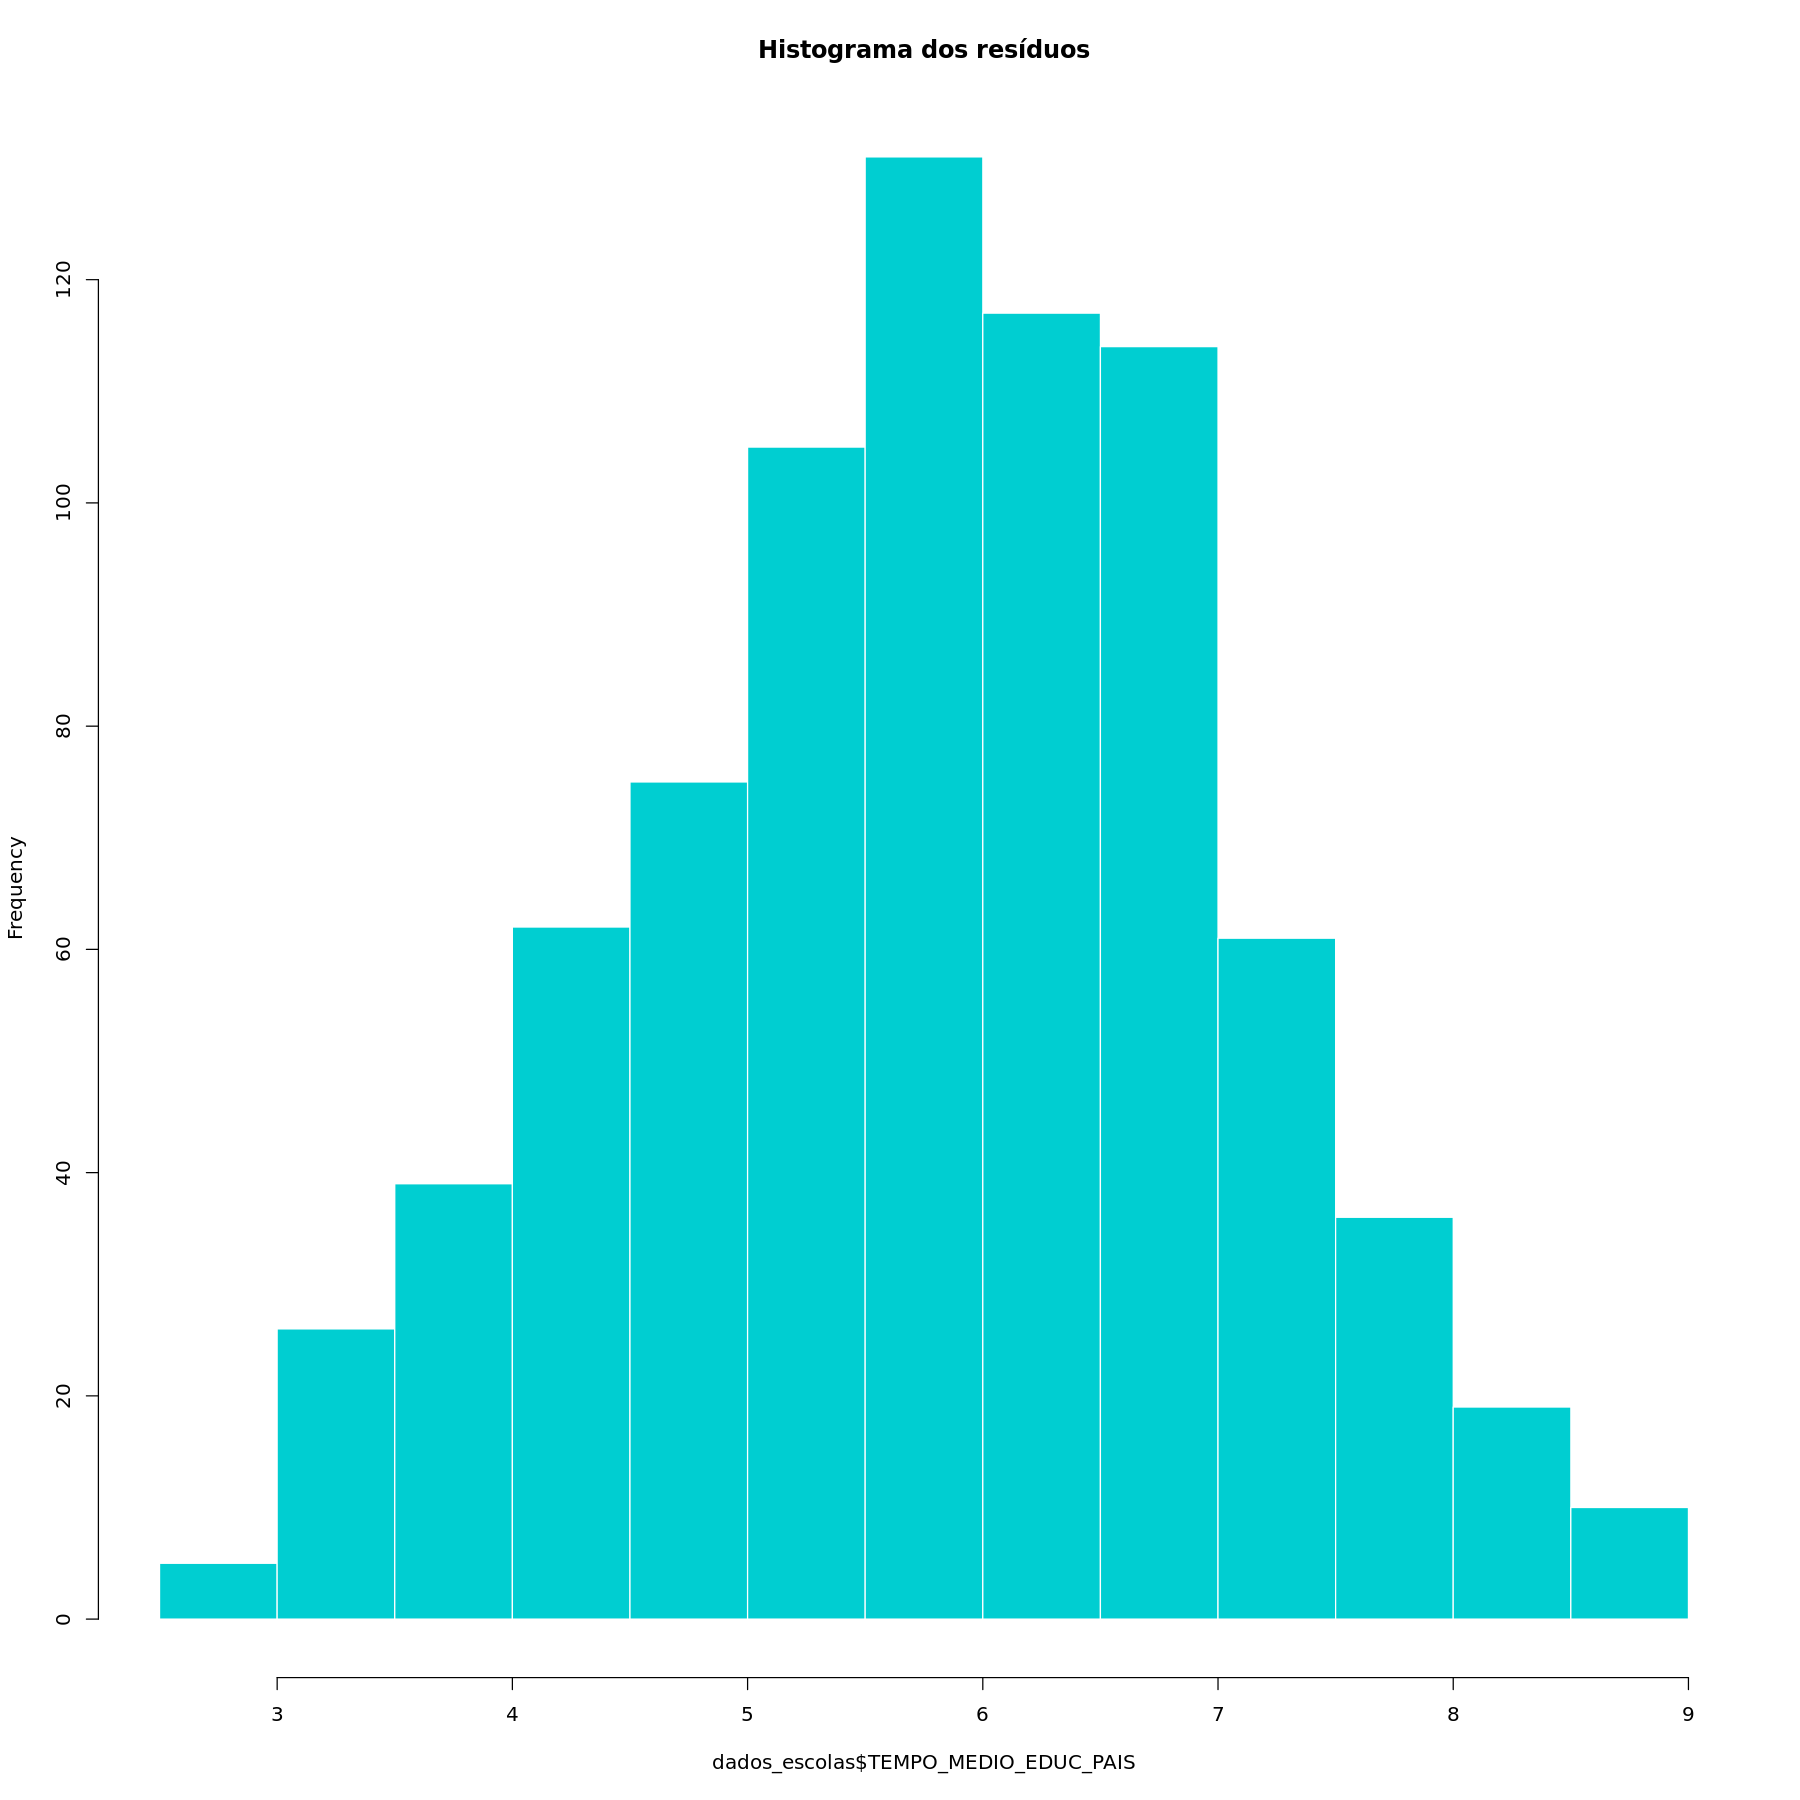

In [109]:
# Histograma dos resíduos
hist(x      = dados_escolas$TEMPO_MEDIO_EDUC_PAIS ,
     main   = "Histograma dos resíduos",
     col    = "darkturquoise",
     border = "white")

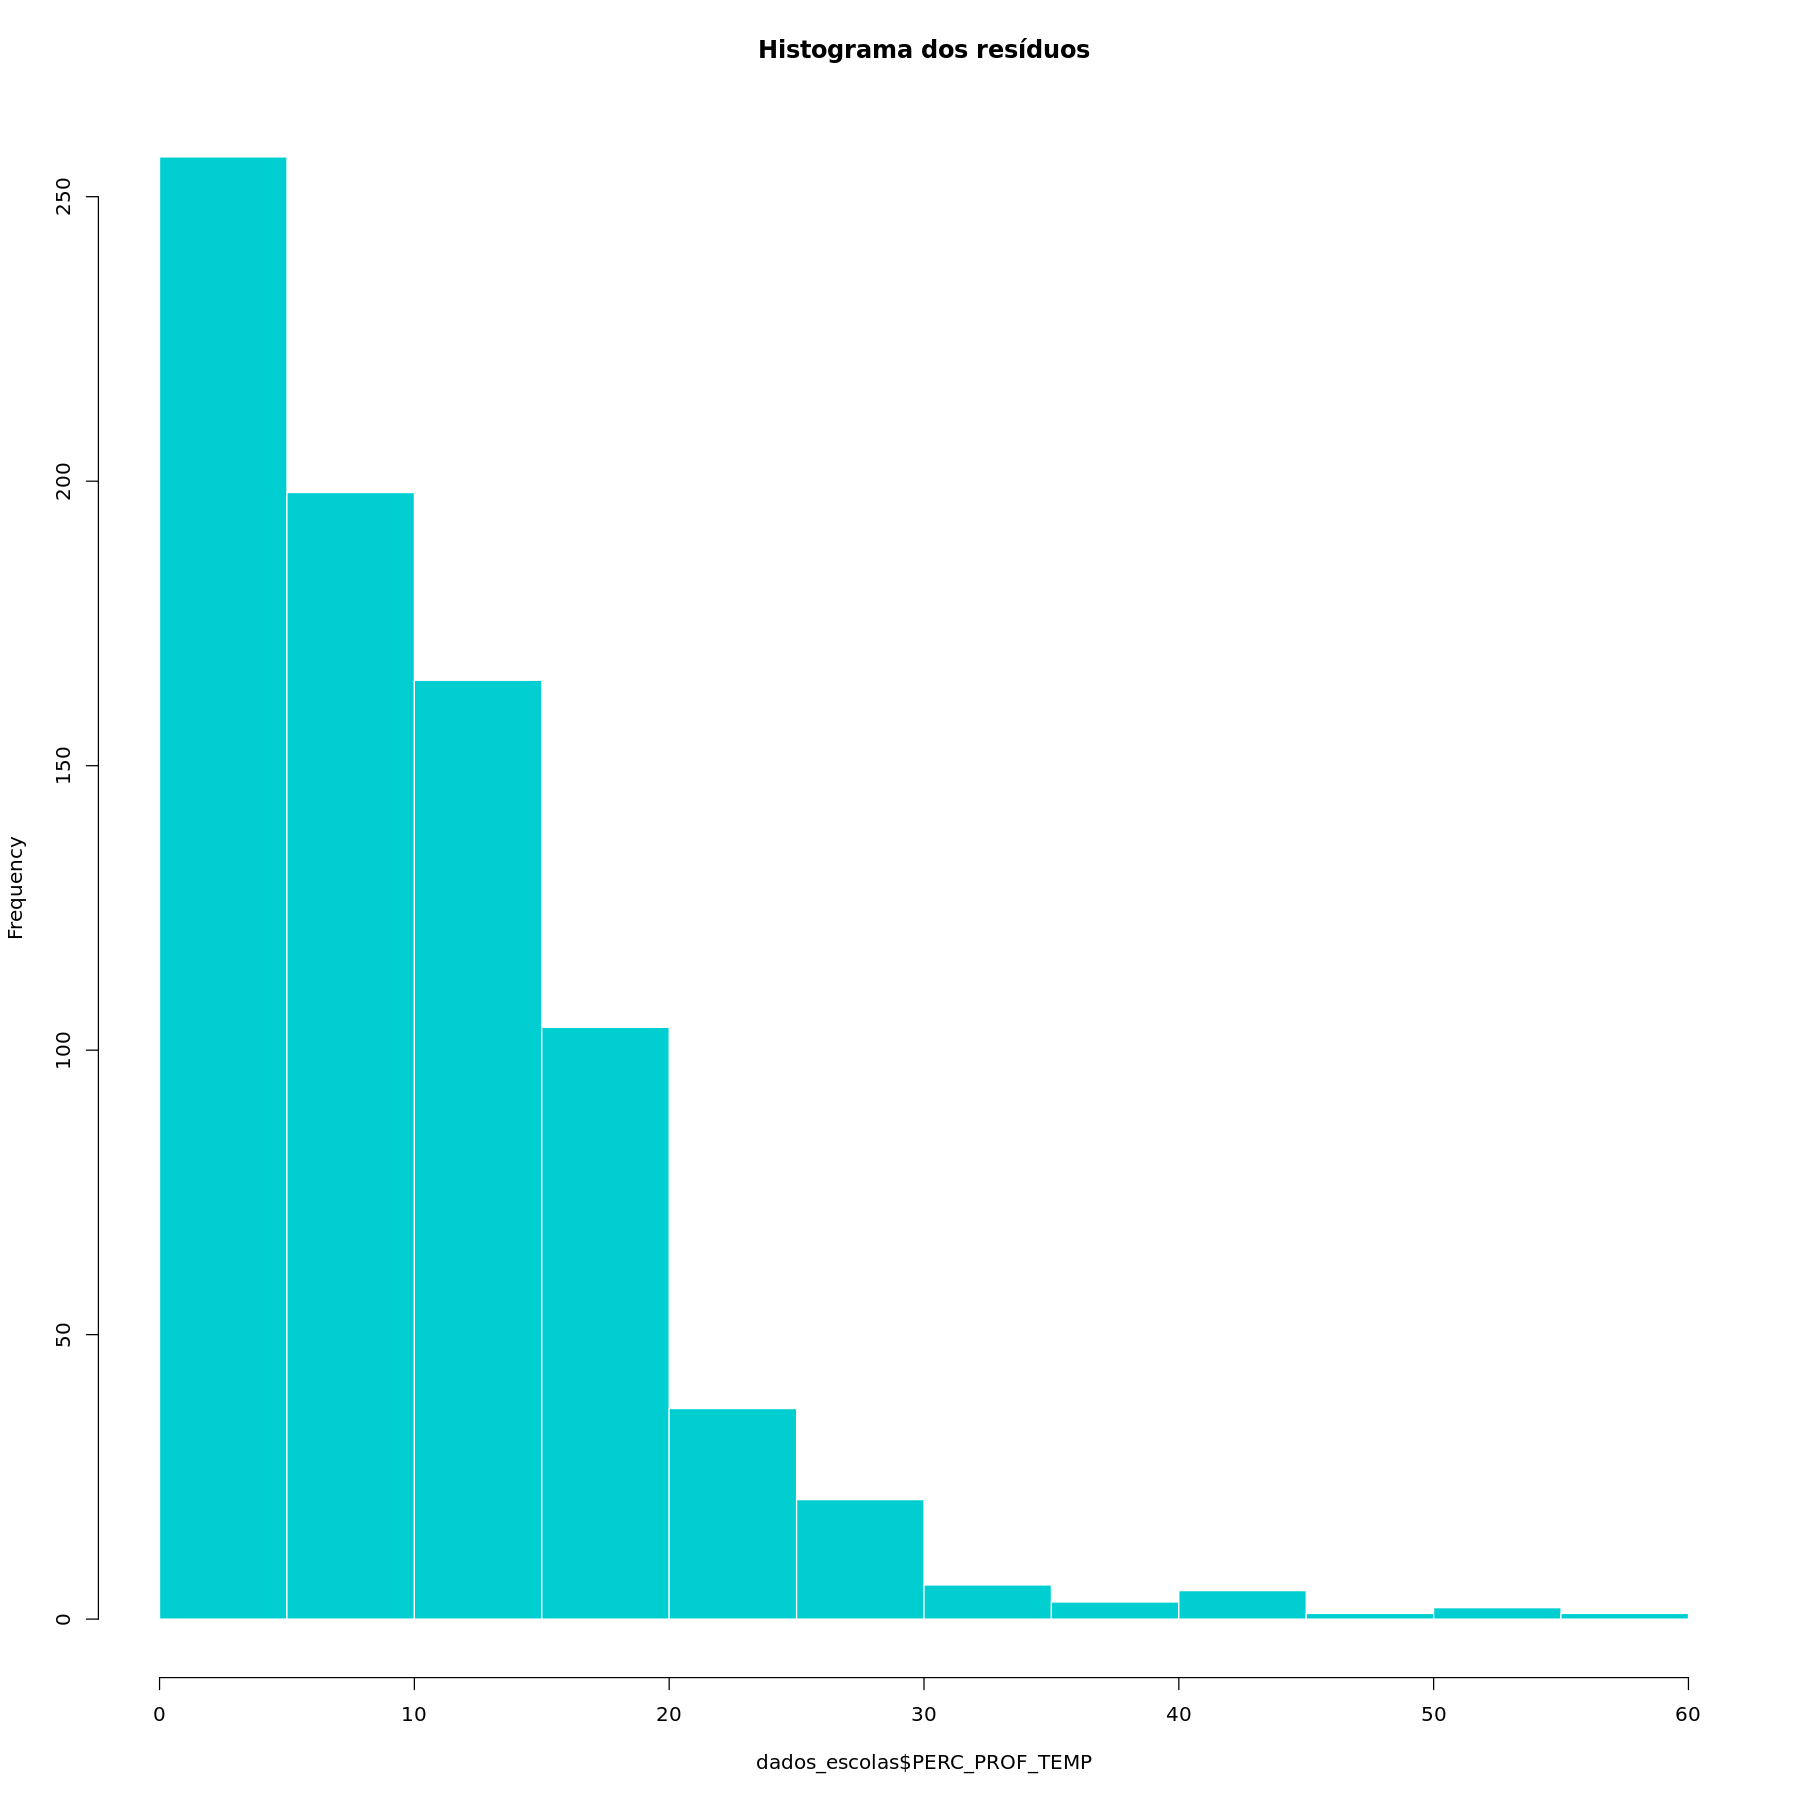

In [108]:
# Histograma dos resíduos
hist(x      = dados_escolas$PERC_PROF_TEMP,
     main   = "Histograma dos resíduos",
     col    = "darkturquoise",
     border = "white")

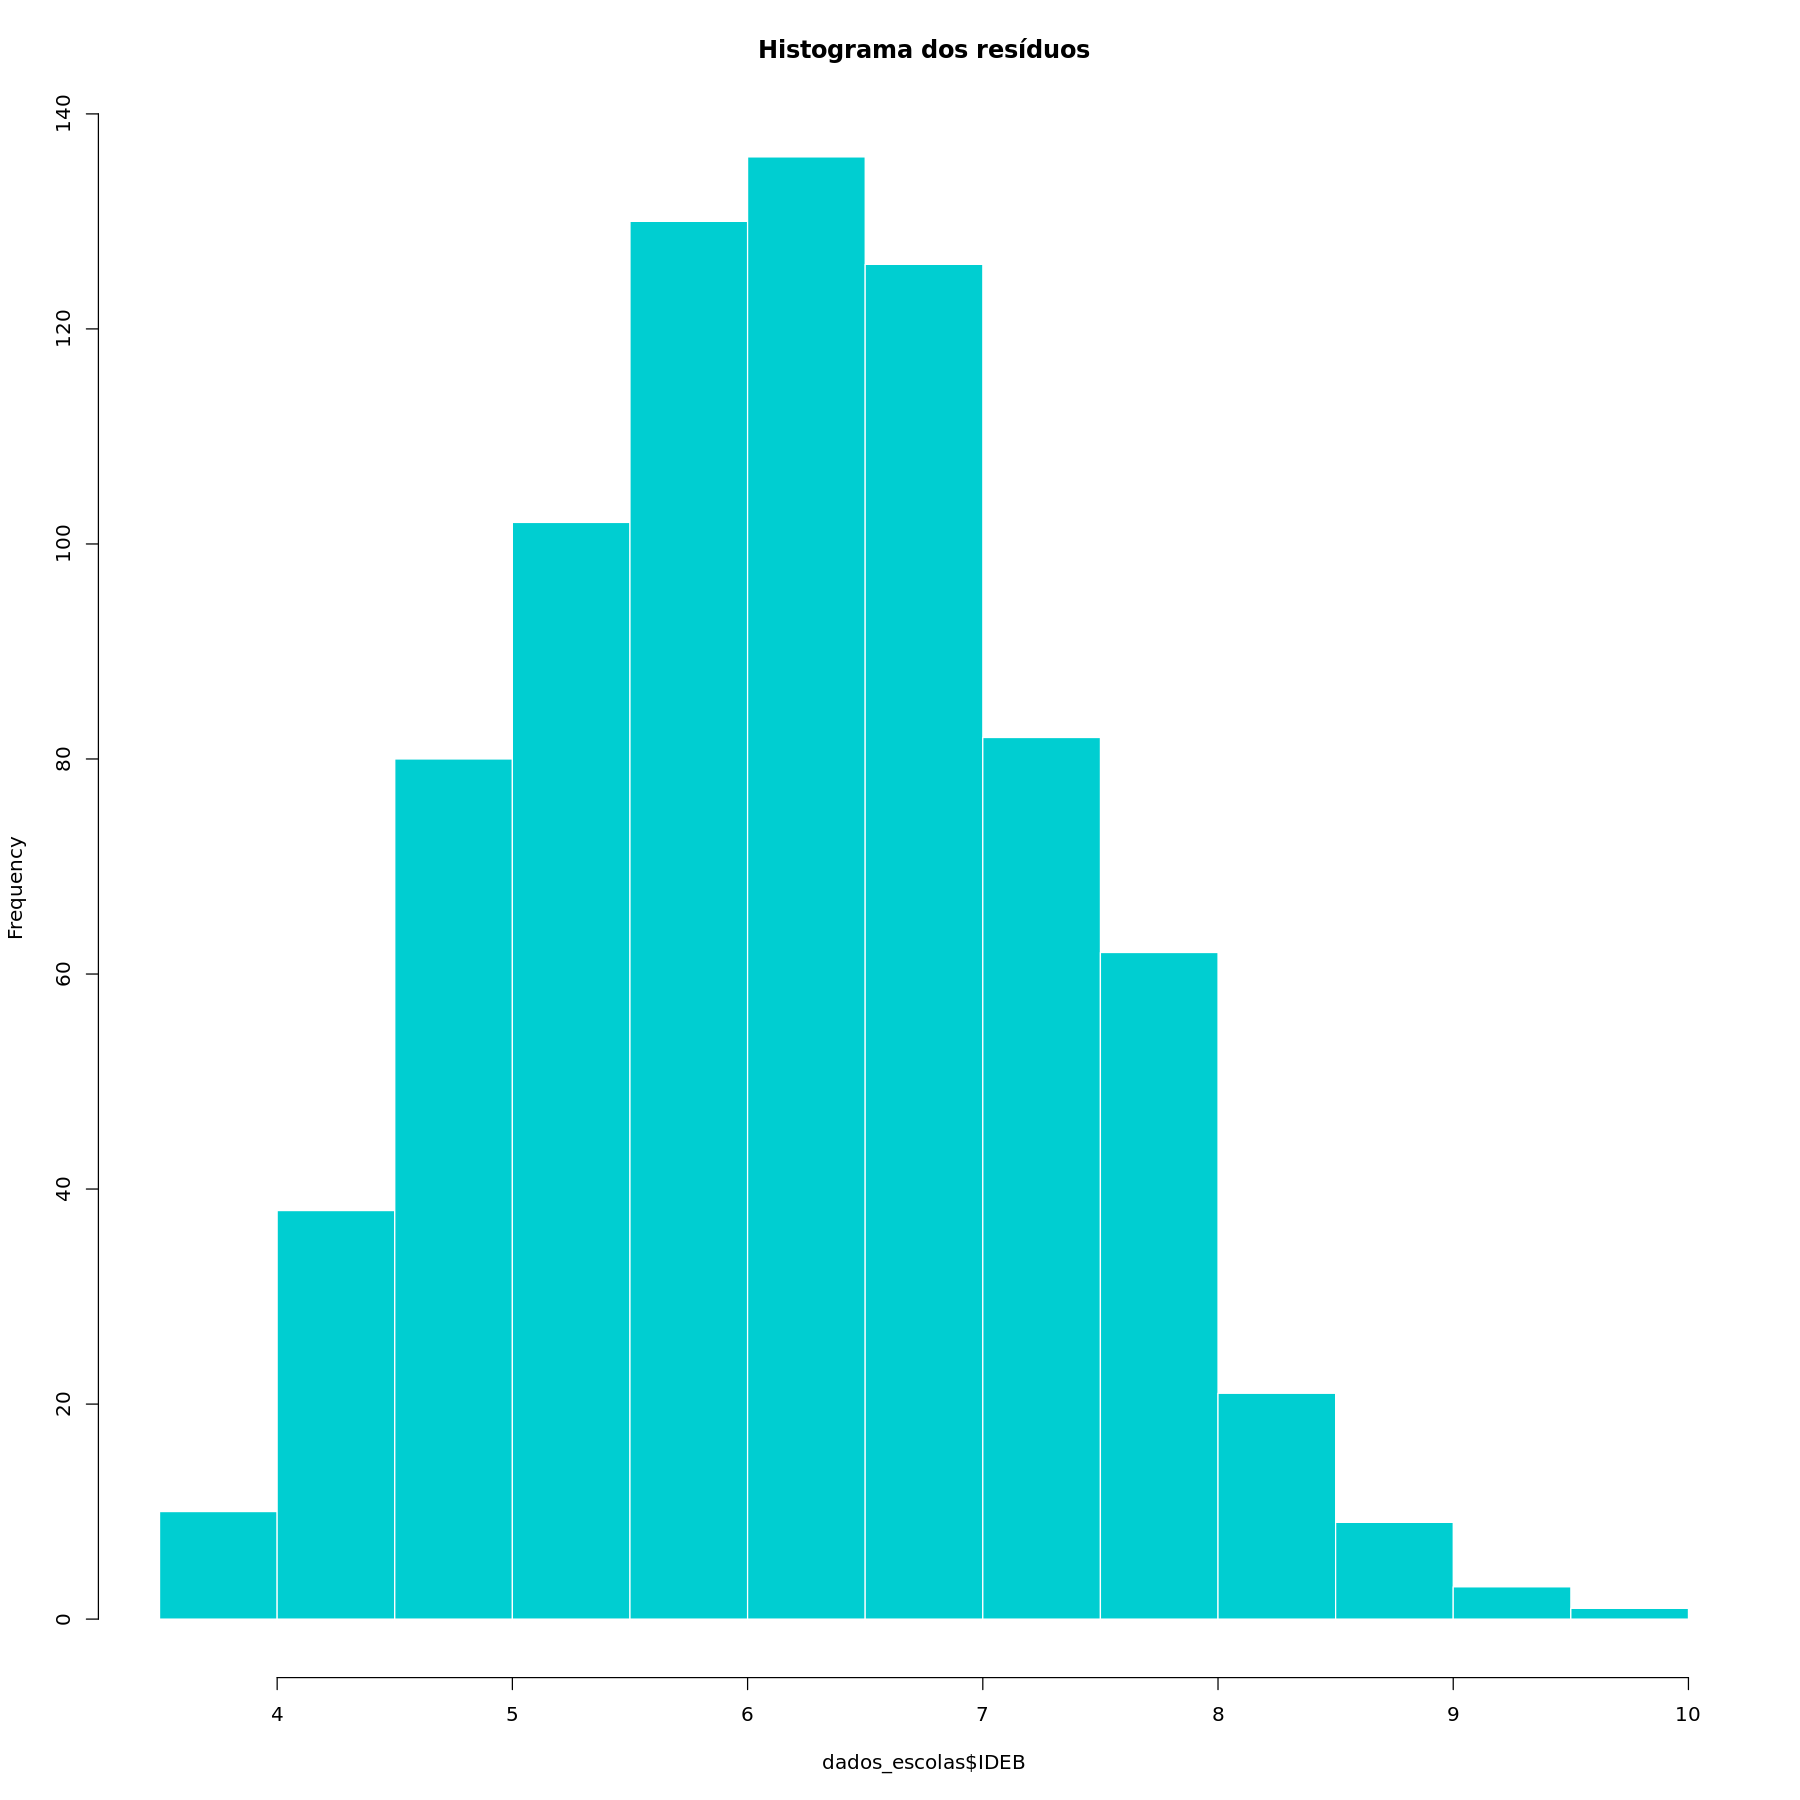

In [107]:
# Histograma dos resíduos
hist(x      = dados_escolas$IDEB,
     main   = "Histograma dos resíduos",
     col    = "darkturquoise",
     border = "white")

### Análise bivariada: variável resposta vs. variáveis explicativas

In [89]:
# Comando auxiliar para aumentar resolução do gráfico (recomendado apenas no Colab)
reset_options <- options()
options(repr.plot.width = 15, repr.plot.height = 15)

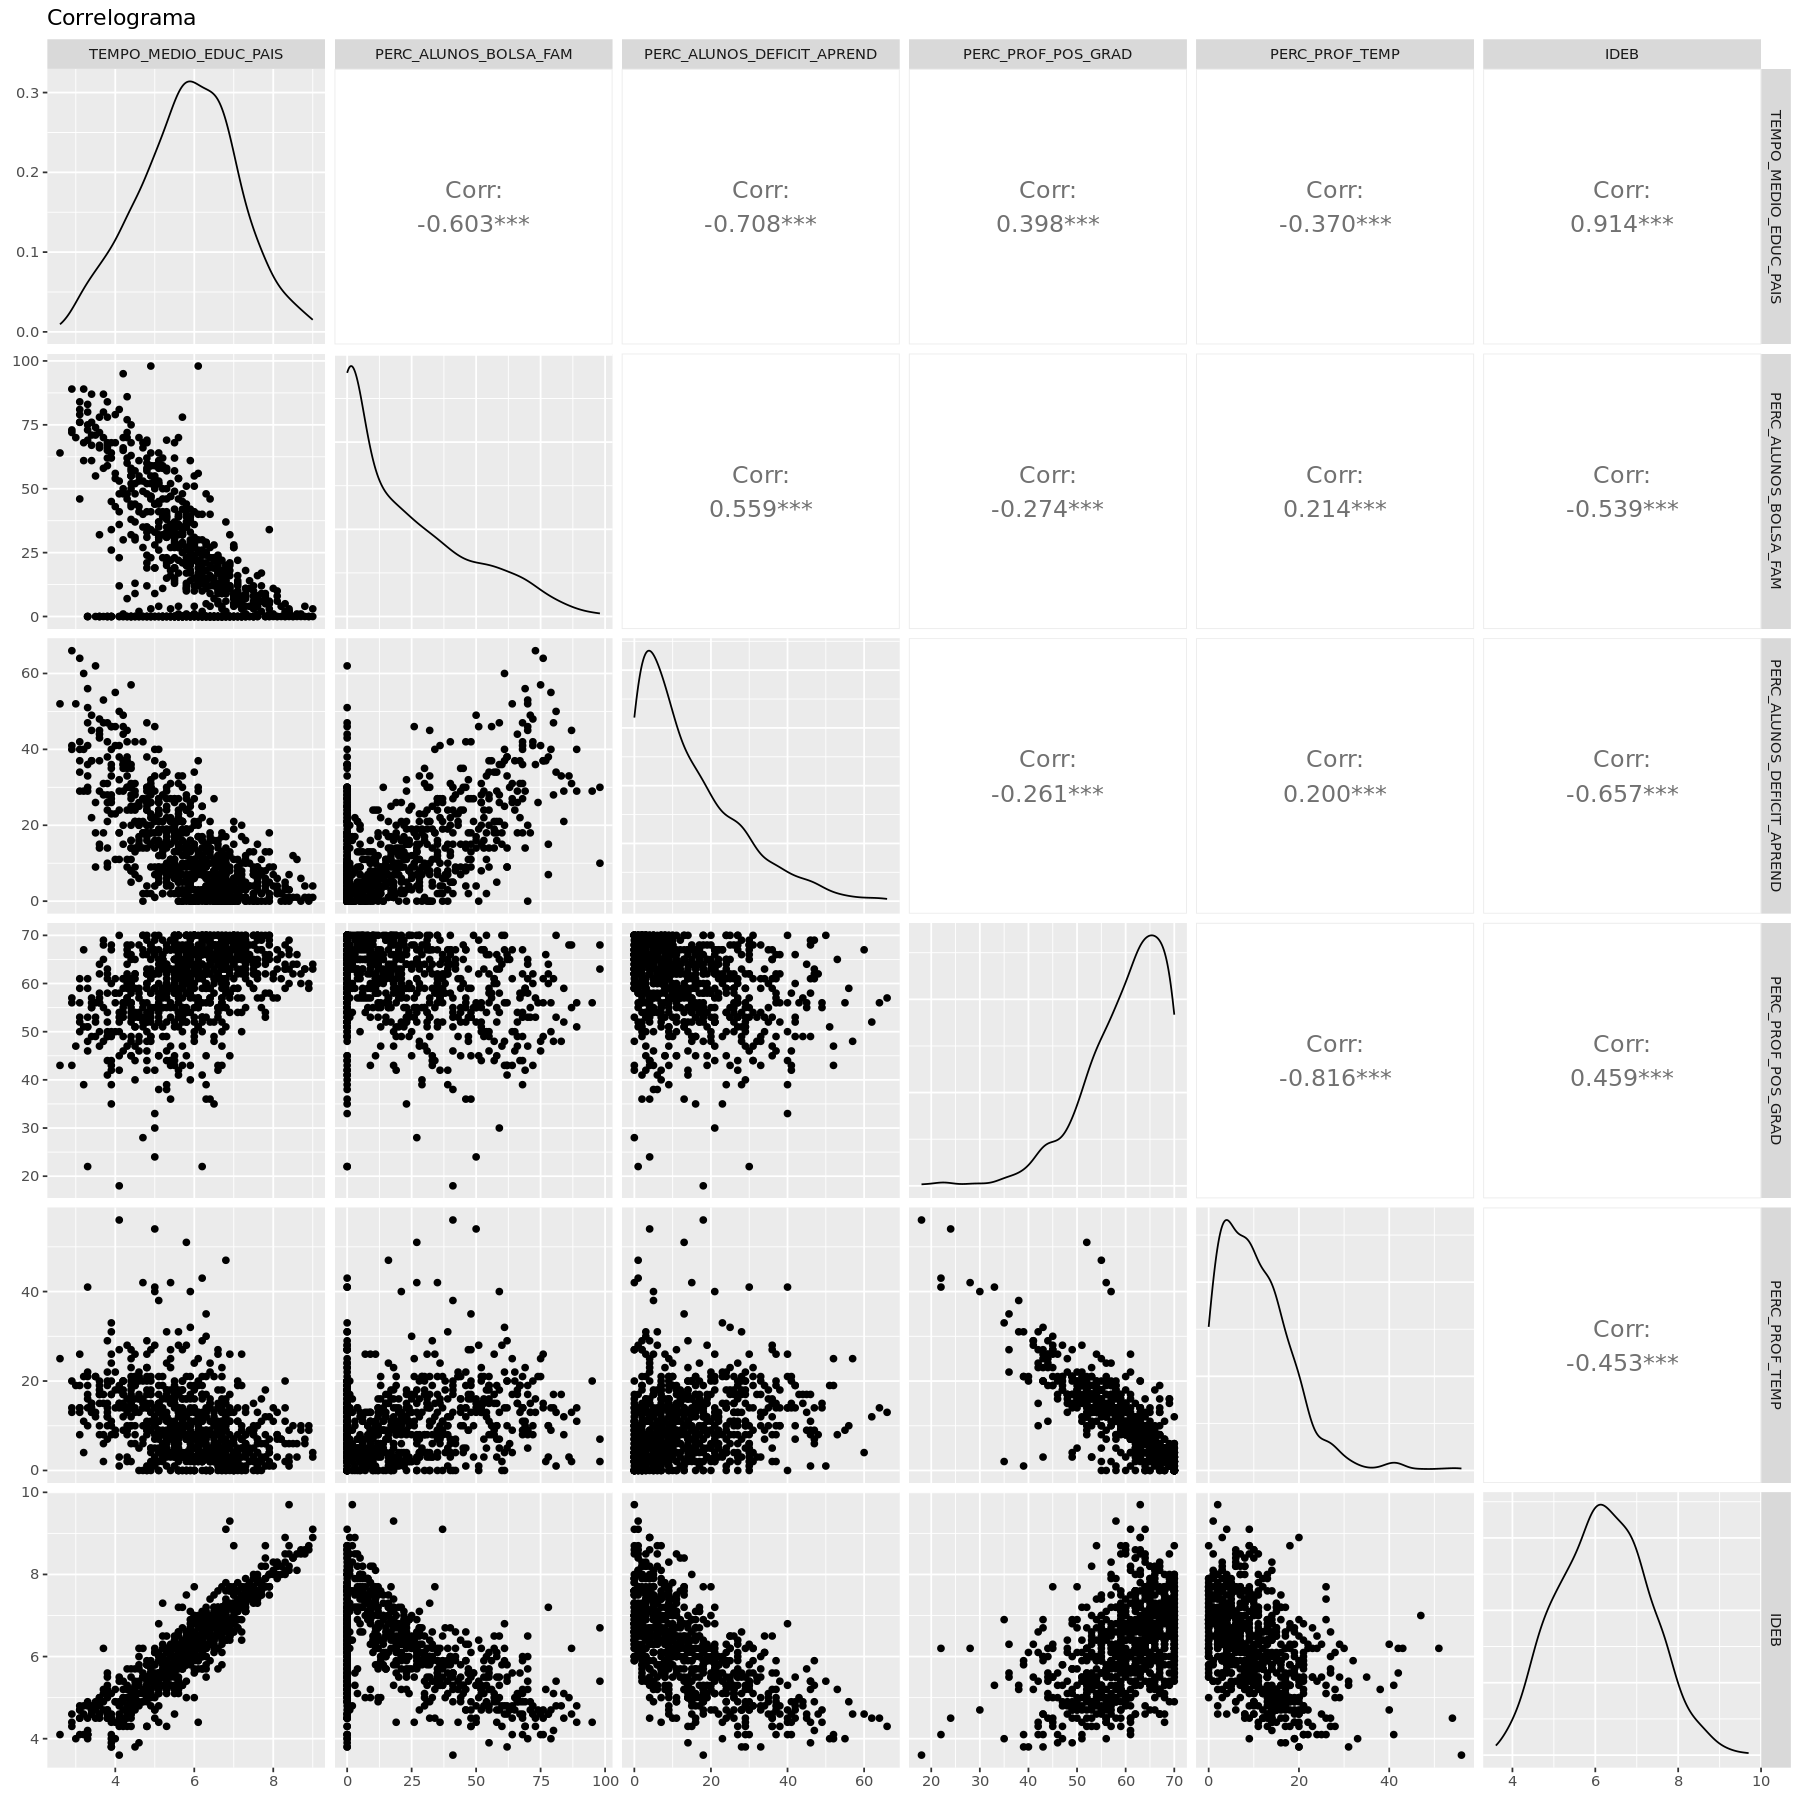

In [92]:
# Correlograma
ggpairs(dados_escolas[, !names(dados_escolas) %in% c("COD_ESCOLA", "ESCOLA_TEMPO_INTEG")],
        title = "Correlograma",
        upper = list(continuous = wrap("cor", size = 5)))

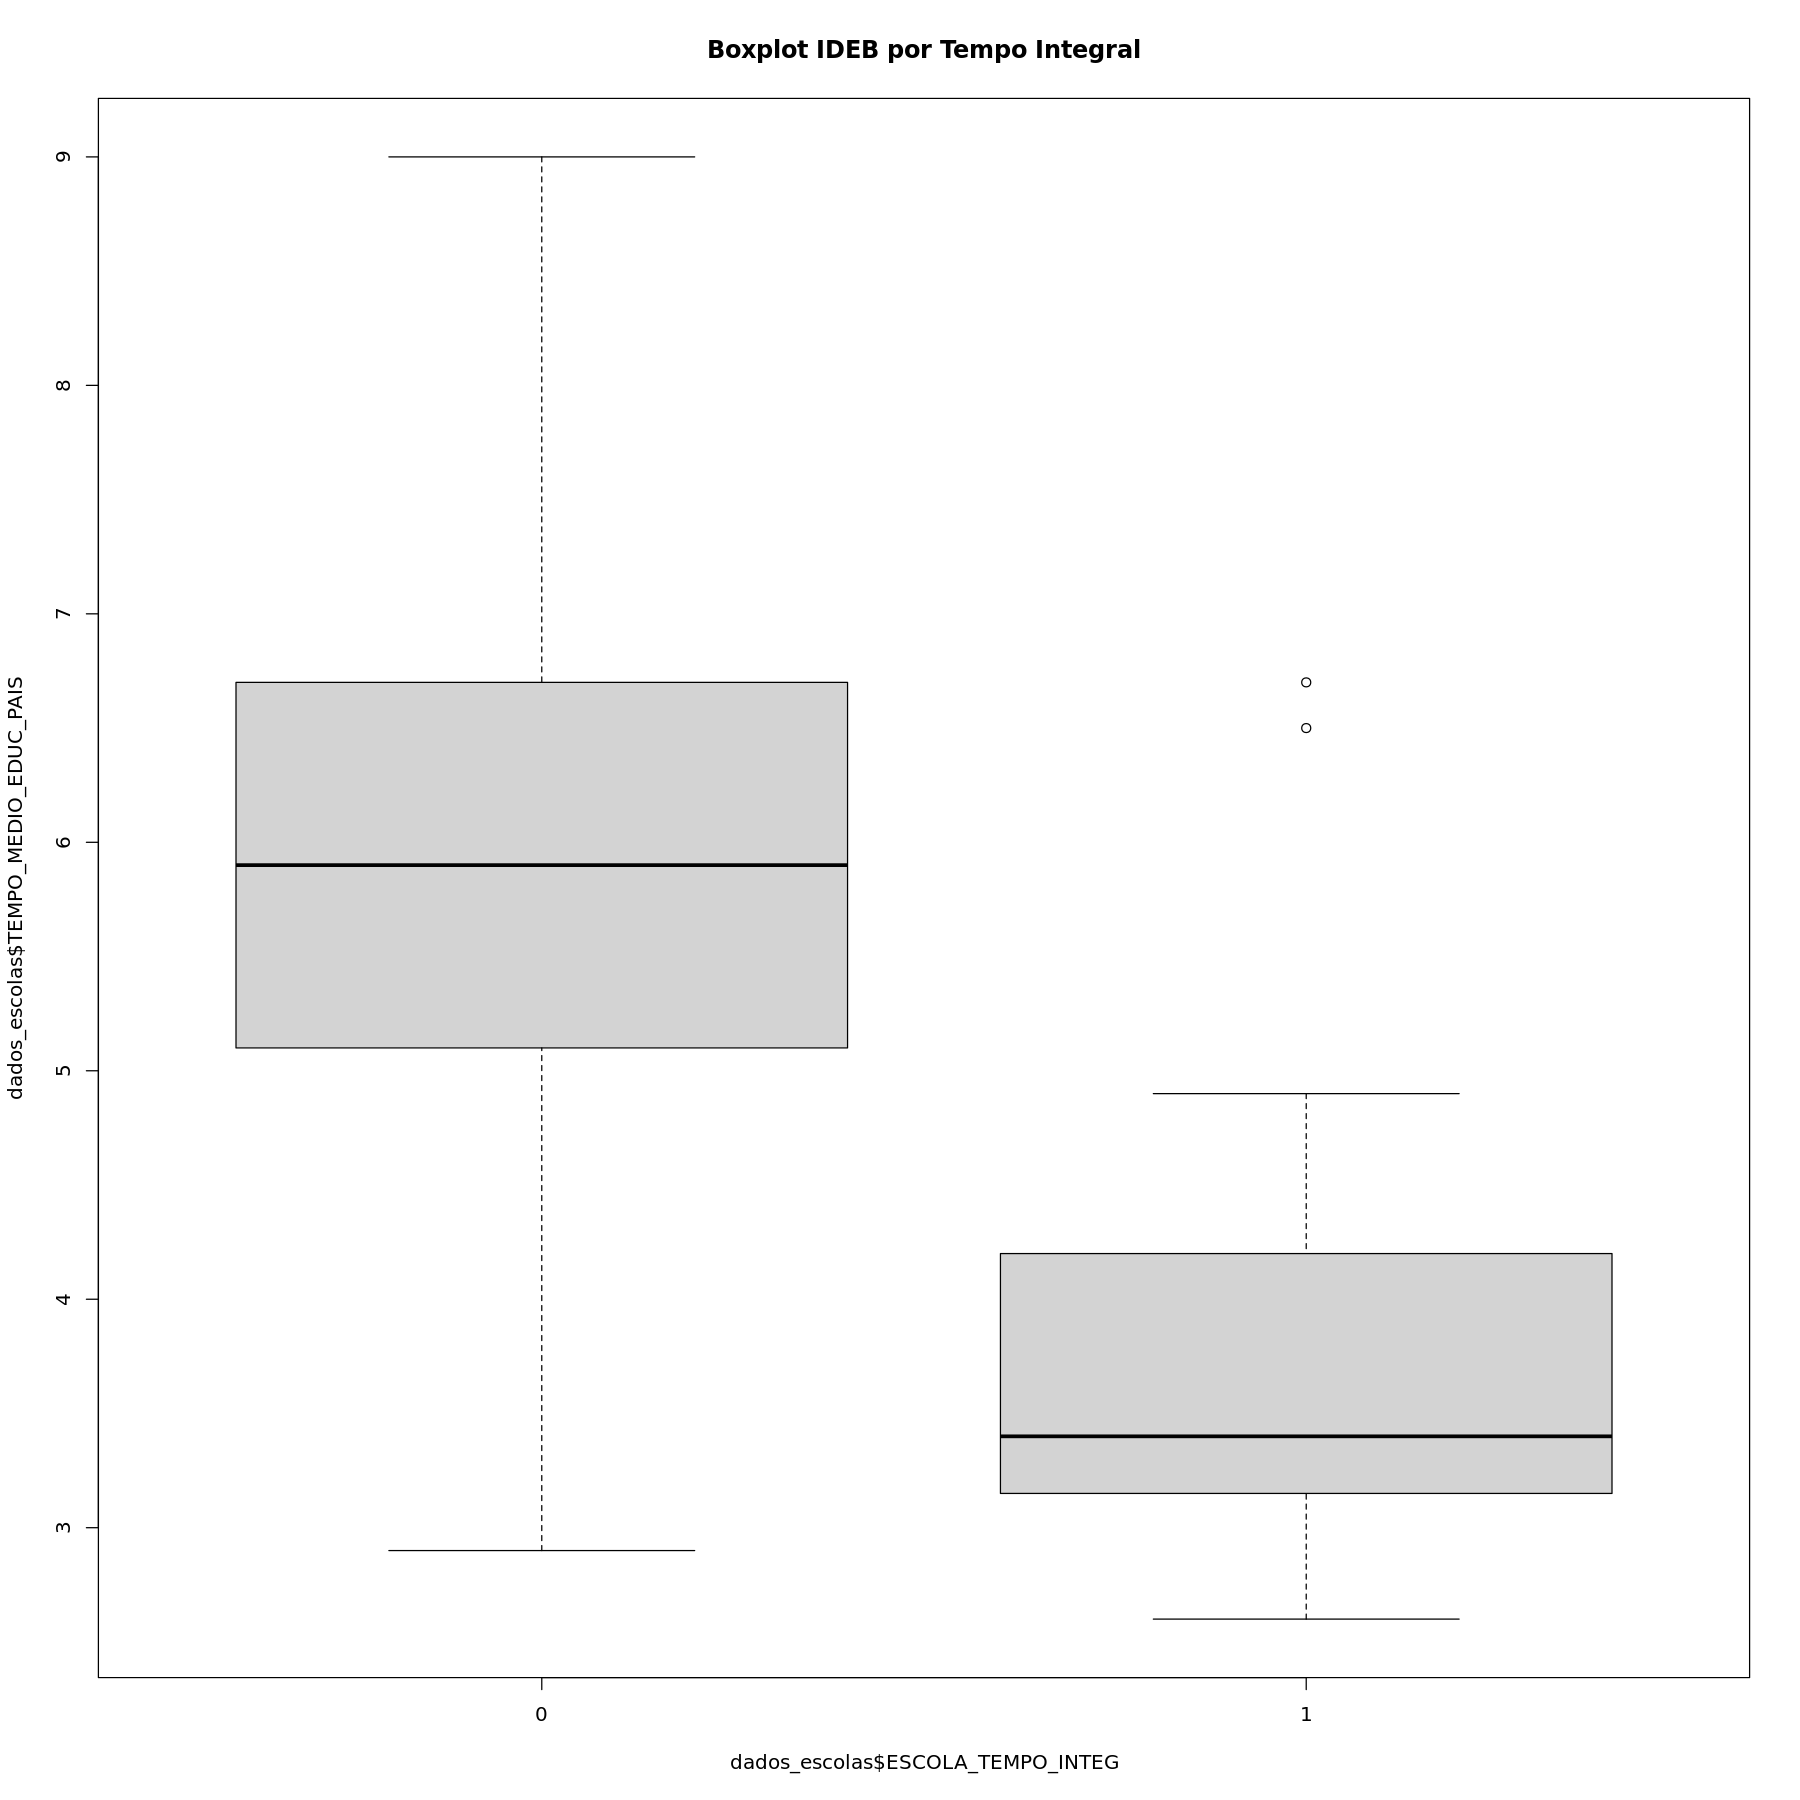

In [96]:
# Boxplot para variável qualitativa FLAG_LITORAL
boxplot(dados_escolas$TEMPO_MEDIO_EDUC_PAIS    ~ dados_escolas$ESCOLA_TEMPO_INTEG,
        main = "Boxplot IDEB por Tempo Integral")

In [87]:
# Resetando parâmetros gráficos (recomendado apenas no Colab)
options(reset_options)

### Modelo de regressão linear múltipla

In [38]:
# Comando auxiliar para para omitir notação científica nos p-valores e controlar largura dos outputs na tela do Colab
options(scipen = 999, width = 200)

In [99]:
# Ajuste do modelo 1: inicial
regressao_1 <- lm(IDEB ~
                TEMPO_MEDIO_EDUC_PAIS +
                PERC_ALUNOS_DEFICIT_APREND +
                PERC_ALUNOS_BOLSA_FAM +
                PERC_PROF_TEMP + 
                PERC_PROF_POS_GRAD +
                ESCOLA_TEMPO_INTEG,
                data = dados_escolas)

summary(regressao_1)


Call:
lm(formula = IDEB ~ TEMPO_MEDIO_EDUC_PAIS + PERC_ALUNOS_DEFICIT_APREND + 
    PERC_ALUNOS_BOLSA_FAM + PERC_PROF_TEMP + PERC_PROF_POS_GRAD + 
    ESCOLA_TEMPO_INTEG, data = dados_escolas)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86109 -0.23608 -0.00284  0.23643  2.13161 

Coefficients:
                            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)                 1.840380   0.252754   7.281    0.000000000000798 ***
TEMPO_MEDIO_EDUC_PAIS       0.740511   0.018918  39.144 < 0.0000000000000002 ***
PERC_ALUNOS_DEFICIT_APREND -0.003754   0.001676  -2.239               0.0254 *  
PERC_ALUNOS_BOLSA_FAM       0.000931   0.000812   1.147               0.2519    
PERC_PROF_TEMP             -0.014818   0.003145  -4.712    0.000002901500998 ***
PERC_PROF_POS_GRAD          0.003798   0.003148   1.207               0.2279    
ESCOLA_TEMPO_INTEG          0.263294   0.102104   2.579               0.0101 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 

In [13]:
# Ajuste do modelo 2: retirando PERC_ALUNOS_BOLSA_FAM
regressao_2 <- lm(IDEB ~
                TEMPO_MEDIO_EDUC_PAIS +
                PERC_ALUNOS_DEFICIT_APREND +
                PERC_PROF_TEMP + 
                PERC_PROF_POS_GRAD +
                ESCOLA_TEMPO_INTEG,
                data = dados_escolas)

summary(regressao_2)


Call:
lm(formula = IDEB ~ TEMPO_MEDIO_EDUC_PAIS + PERC_ALUNOS_DEFICIT_APREND + 
    PERC_PROF_TEMP + PERC_PROF_POS_GRAD + ESCOLA_TEMPO_INTEG, 
    data = dados_escolas)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.85911 -0.23359  0.00192  0.23159  2.13973 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.906585   0.246119   7.747 2.88e-14 ***
TEMPO_MEDIO_EDUC_PAIS       0.733670   0.017956  40.860  < 2e-16 ***
PERC_ALUNOS_DEFICIT_APREND -0.003325   0.001634  -2.034  0.04225 *  
PERC_PROF_TEMP             -0.014943   0.003144  -4.754 2.37e-06 ***
PERC_PROF_POS_GRAD          0.003614   0.003144   1.149  0.25071    
ESCOLA_TEMPO_INTEG          0.282426   0.100751   2.803  0.00518 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4146 on 794 degrees of freedom
Multiple R-squared:  0.8527,	Adjusted R-squared:  0.8518 
F-statistic: 919.1 on 5 and 794 DF,  p-value

In [102]:
# Avaliação de colinearidade no modelo 2
data.frame(VIF = vif(regressao_2))

,VIF
,<dbl>
TEMPO_MEDIO_EDUC_PAIS,2.291710
PERC_ALUNOS_DEFICIT_APREND,2.038494
PERC_PROF_TEMP,3.095661
PERC_PROF_POS_GRAD,3.181118
ESCOLA_TEMPO_INTEG,1.095409


In [103]:
# Ajuste do modelo 3: retirando PERC_PROF_POS_GRAD 
regressao_3 <- lm(IDEB ~
                TEMPO_MEDIO_EDUC_PAIS +
                PERC_ALUNOS_DEFICIT_APREND +
                PERC_PROF_TEMP + 
                ESCOLA_TEMPO_INTEG,
                data = dados_escolas)

summary(regressao_3)


Call:
lm(formula = IDEB ~ TEMPO_MEDIO_EDUC_PAIS + PERC_ALUNOS_DEFICIT_APREND + 
    PERC_PROF_TEMP + ESCOLA_TEMPO_INTEG, data = dados_escolas)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86835 -0.22398  0.00373  0.23909  2.11517 

Coefficients:
                            Estimate Std. Error t value             Pr(>|t|)    
(Intercept)                 2.146842   0.129976  16.517 < 0.0000000000000002 ***
TEMPO_MEDIO_EDUC_PAIS       0.735020   0.017921  41.014 < 0.0000000000000002 ***
PERC_ALUNOS_DEFICIT_APREND -0.003434   0.001632  -2.104              0.03567 *  
PERC_PROF_TEMP             -0.017794   0.001932  -9.208 < 0.0000000000000002 ***
ESCOLA_TEMPO_INTEG          0.265151   0.099644   2.661              0.00795 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4147 on 795 degrees of freedom
Multiple R-squared:  0.8524,	Adjusted R-squared:  0.8517 
F-statistic:  1148 on 4 and 795 DF,  p-value: < 0.00000000000000022

In [106]:
# Avaliação de colinearidade no modelo 3
data.frame(VIF = vif(regressao_3))

,VIF
,<dbl>
TEMPO_MEDIO_EDUC_PAIS,2.281911
PERC_ALUNOS_DEFICIT_APREND,2.031603
PERC_PROF_TEMP,1.169272
ESCOLA_TEMPO_INTEG,1.071036


In [3]:
# Ajuste do modelo 4: retirando PERC_ALUNOS_DEFICIT_APREND 
regressao_4 <- lm(IDEB ~
                TEMPO_MEDIO_EDUC_PAIS +
                PERC_PROF_TEMP + 
                ESCOLA_TEMPO_INTEG,
                data = dados_escolas)

summary(regressao_4)


Call:
lm(formula = IDEB ~ TEMPO_MEDIO_EDUC_PAIS + PERC_PROF_TEMP + 
    ESCOLA_TEMPO_INTEG, data = dados_escolas)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.85455 -0.23737  0.00388  0.24096  2.13887 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.945083   0.087941  22.118   <2e-16 ***
TEMPO_MEDIO_EDUC_PAIS  0.760695   0.013154  57.831   <2e-16 ***
PERC_PROF_TEMP        -0.017409   0.001928  -9.030   <2e-16 ***
ESCOLA_TEMPO_INTEG     0.250378   0.099610   2.514   0.0121 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4156 on 796 degrees of freedom
Multiple R-squared:  0.8516,	Adjusted R-squared:  0.8511 
F-statistic:  1523 on 3 and 796 DF,  p-value: < 2.2e-16


In [4]:
# Avaliação de colinearidade no modelo 4
data.frame(VIF = vif(regressao_4))

,VIF
,<dbl>
TEMPO_MEDIO_EDUC_PAIS,1.224081
PERC_PROF_TEMP,1.158824
ESCOLA_TEMPO_INTEG,1.065718


### Intervalos de confiança

In [5]:
# Escolha do beta (0 para intercepto, ou 1, 2, ... para os ângulos referentes a cada variável explicativa)
beta = 0

In [6]:
# Cálculo do intervalo
print("Limite inferior")
as.numeric(regressao_4$coefficients[beta + 1] - 1.96 * coef(summary(regressao_4))[beta + 1, "Std. Error"])
print("Limite superior")
as.numeric(regressao_4$coefficients[beta + 1] + 1.96 * coef(summary(regressao_4))[beta + 1, "Std. Error"])

[1] "Limite inferior"


[1] 1.772717

[1] "Limite superior"


[1] 2.117448

### Qualidade de ajuste

In [78]:
# Coeficiente de determinação ajustado (R² ajustado)
summary(regressao_4)$adj.r.squared

[1] 0.851054

In [79]:
# MAE
sum(abs(regressao_4$residuals))/nrow(dados_escolas)

[1] 0.3064835

In [80]:
# MAPE
sum(abs(regressao_4$residuals/dados_escolas$IDEB))/nrow(dados_escolas)

[1] 0.05198543

### Análise de resíduos

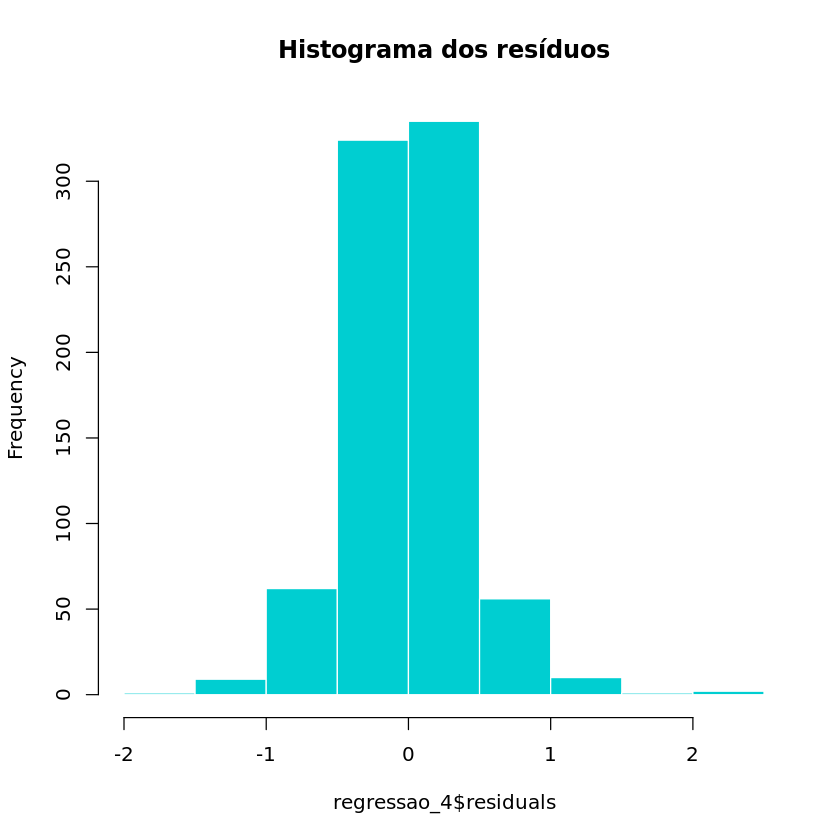

In [75]:
# Histograma dos resíduos
hist(x      = regressao_4$residuals,
     main   = "Histograma dos resíduos",
     col    = "darkturquoise",
     border = "white")

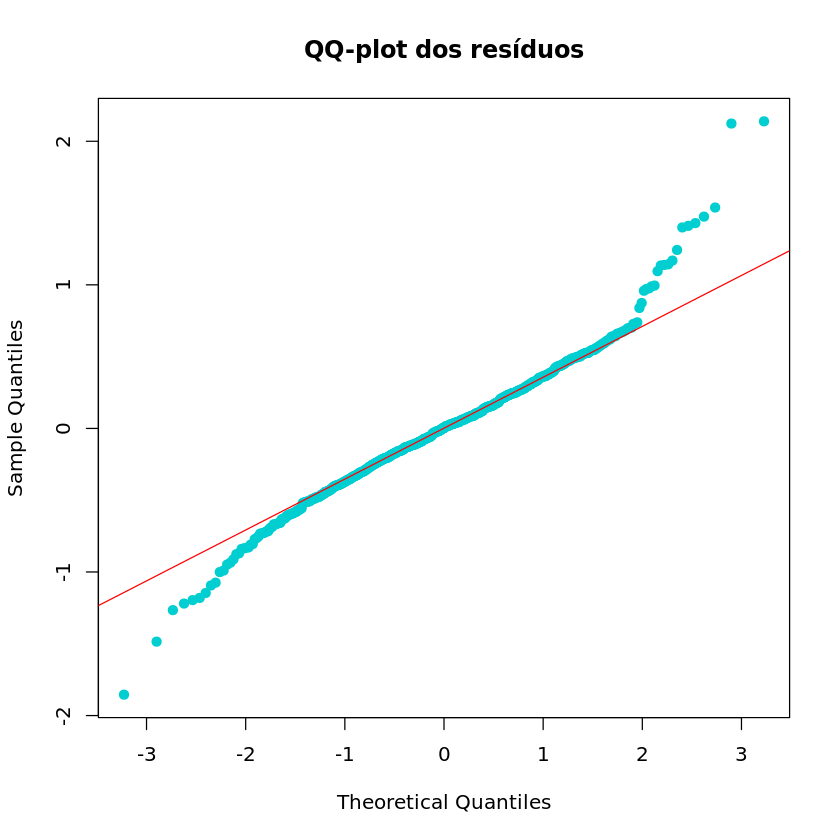

In [76]:
# QQ plot dos resíduos
qqnorm(y    = regressao_4$residuals,
       main = "QQ-plot dos resíduos",
       col  = "darkturquoise",
       pch  = 19)
qqline(y    = regressao_4$residuals,
       col  = "red")

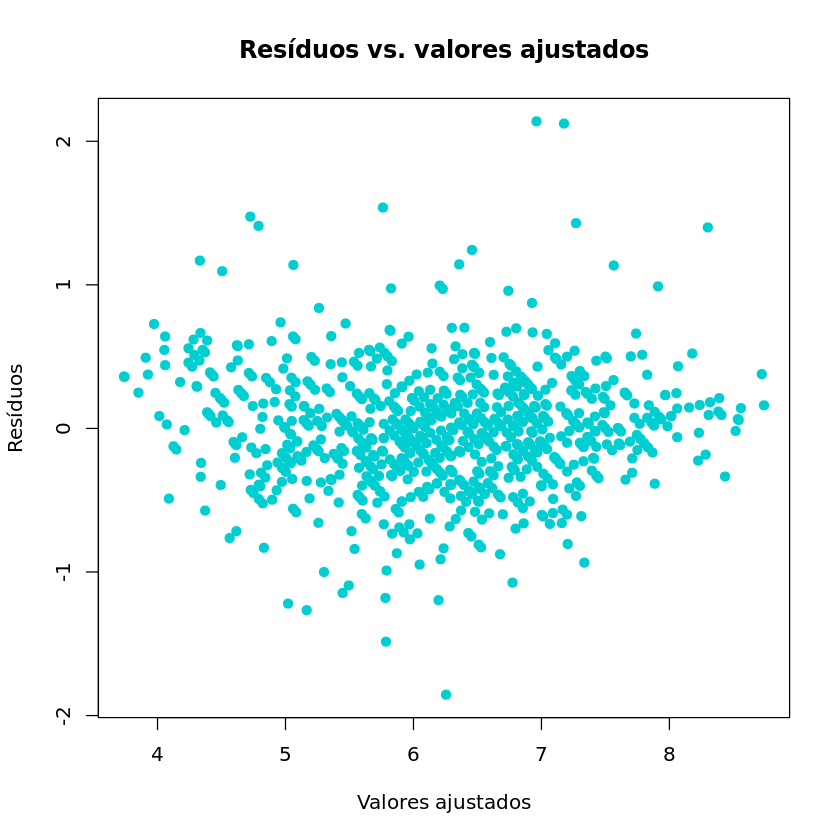

In [77]:
# Resíduos vs. valores preditos
plot(x    = regressao_4$fitted.values,
     y    = regressao_4$residuals,
     pch  = 19,
     col  = "darkturquoise",
     xlab = "Valores ajustados",
     ylab = "Resíduos",
     main = "Resíduos vs. valores ajustados")

### Exemplo de uso (aplicação) do modelo

In [17]:
# Criação de base de dados com uma nova unidade no litoral, que recebeu em média 3.000 clientes por mês de jan a nov,
# tem nota média igual a 9 para os três aspectos avaliados e tempo de espera médio de 20’
# Obs.: os nomes das colunas devem ser idênticos aos da base utilizada para construção do modelo
novos_dados <- data.frame(TEMPO_MEDIO_EDUC_PAIS        = c(7),
                          PERC_PROF_TEMP     = c(20),
                          PERC_ALUNOS_DEFICIT_APREND     = c(15),
                          PERC_PROF_POS_GRAD     = c(40),
                          ESCOLA_TEMPO_INTEG    = c(0))


In [18]:
# Aplicação do modelo
novos_dados$IDEB <- predict(regressao_2, novos_dados)
View(novos_dados)

TEMPO_MEDIO_EDUC_PAIS,PERC_PROF_TEMP,PERC_ALUNOS_DEFICIT_APREND,PERC_PROF_POS_GRAD,ESCOLA_TEMPO_INTEG,IDEB
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7,20,15,40,0,6.838119
